## Data Preprocessing

In [1]:
import mne
import numpy as np
import matplotlib.pyplot as plt

#for plotting in the notebook
%matplotlib inline

#for opening UI in seperate window
#import PyQt5
#%matplotlib qt5

### Reading and visualisation

In [4]:
raw = mne.io.read_raw_brainvision("data/resting_state/zavrin_open_eyes_eeg_15021500.vhdr", preload=True)
raw.get_data().shape

Extracting parameters from data/resting_state/zavrin_open_eyes_eeg_15021500.vhdr...
Setting channel info structure...
Reading 0 ... 301999  =      0.000 ...   301.999 secs...


(61, 302000)

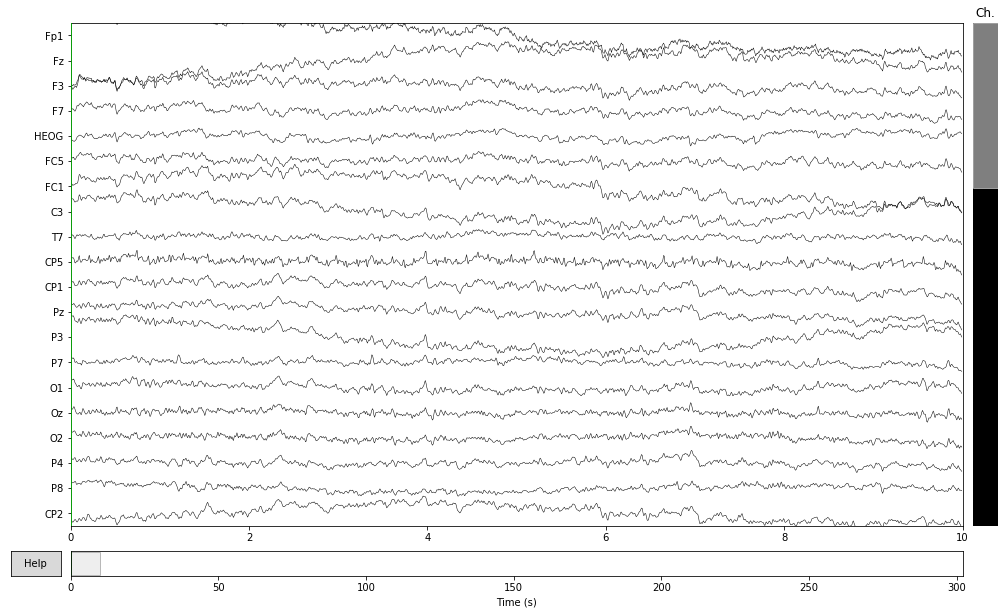

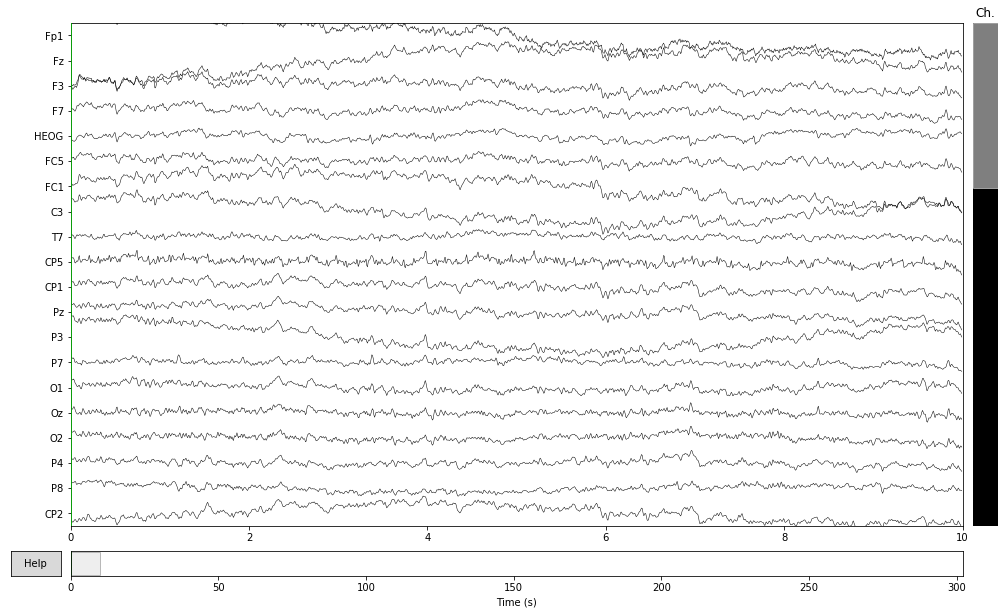

In [5]:
raw.plot(block=True, lowpass=40)

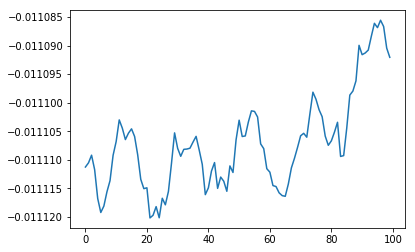

In [6]:
ch_num = 1
start = 0
end = 100

plt.plot(raw.get_data()[ch_num][start:end])

### Calculating statistics

Effective window size : 2.048 (s)
Channel locations not available. Disabling spatial colors.


<ipython-input-7-5f454bfb6175>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(tmax=np.inf, average=False)


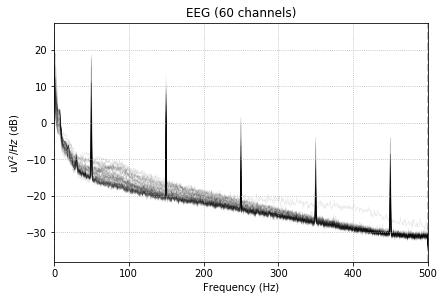

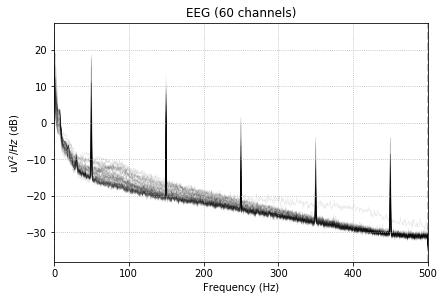

In [7]:
raw.plot_psd(tmax=np.inf, average=False)

In [8]:
raw.info

<Info | 17 non-empty fields
    bads : list | 0 items
    buffer_size_sec : float | 1.0
    ch_names : list | Fp1, Fz, F3, F7, HEOG, FC5, FC1, C3, T7, ...
    chs : list | 61 items (EEG: 60, STIM: 1)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    events : list | 0 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 500.0 Hz
    meas_date : int | 1511965713
    nchan : int | 61
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 1000.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    dig : NoneType
    experimenter : NoneType
    file_id : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_name : NoneType
    subject_info : NoneType
    xplotter_layout : N

In [9]:
raw.get_data().mean(axis = 1)

array([ -2.24967933e-02,  -1.10168948e-02,  -3.78008283e-03,
        -9.35546260e-03,  -9.93139163e-03,  -7.29884524e-03,
        -1.21969218e-02,  -1.41059861e-02,  -2.17867644e-03,
        -1.08270224e-02,  -4.78528820e-03,  -3.53754628e-03,
        -1.56318190e-02,  -7.13576691e-03,  -3.64841720e-03,
         7.66854316e-03,   1.69765051e-03,  -2.50587693e-03,
        -1.55495551e-02,  -3.38840979e-03,   4.94147619e-03,
         1.26232073e-03,  -1.63027989e-03,  -1.26025153e-02,
        -4.71076270e-03,  -3.91827803e-03,   8.42002772e-04,
        -2.08983172e-02,  -2.93398041e-02,  -2.02319291e-02,
        -1.28013157e-02,  -2.08936119e-02,  -1.77399733e-02,
        -3.14289939e-03,  -6.33324779e-03,  -2.36432870e-04,
        -4.34219864e-03,  -4.57511188e-03,  -6.34250242e-03,
        -1.64871098e-02,   9.55404434e-04,   4.42471381e-03,
        -5.96140719e-03,  -1.55780851e-03,  -6.89074879e-03,
         3.97172447e-03,   6.08258674e-03,   6.00888882e-05,
        -1.97711313e-04,

In [10]:
raw.get_data().mean()

-0.0056050011971920475

In [11]:
raw.get_data().std(axis = 1)

array([  1.10622780e-04,   3.71891391e-05,   4.63523803e-05,
         4.26558372e-05,   1.59675547e-05,   1.09015637e-04,
         9.79514510e-05,   2.78053804e-05,   3.41943585e-05,
         2.50781197e-05,   1.15893112e-04,   8.67090355e-05,
         3.19033787e-05,   1.96528105e-05,   4.82171471e-05,
         4.71234059e-05,   1.58336967e-05,   3.08337768e-05,
         2.08206562e-05,   4.99662146e-05,   2.89206561e-05,
         3.08297038e-05,   1.89991439e-05,   7.94988428e-05,
         3.48917165e-05,   6.17899618e-05,   3.02022440e-05,
         4.38224410e-04,   1.31728510e-04,   3.38923064e-05,
         2.92246654e-05,   4.94555425e-05,   4.56665052e-05,
         1.57219245e-05,   1.09520072e-04,   1.62960541e-05,
         6.77037996e-05,   2.99413366e-05,   4.21462931e-05,
         2.36194957e-05,   3.27058756e-05,   1.44736210e-05,
         6.55127016e-04,   1.41002131e-04,   4.27148742e-05,
         6.43905667e-05,   5.97447385e-05,   7.55269822e-05,
         2.03998724e-05,

In [12]:
raw.get_data().std()

0.0077656409186128783

In [13]:
raw.set_eeg_reference('average', projection=True)
# Give the sample rate
print('sample rate:', raw.info['sfreq'], 'Hz')
# Give the size of the data matrix
print('%s channels x %s samples' % (len(raw), len(raw.times)))

Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
sample rate: 1000.0 Hz
302000 channels x 302000 samples


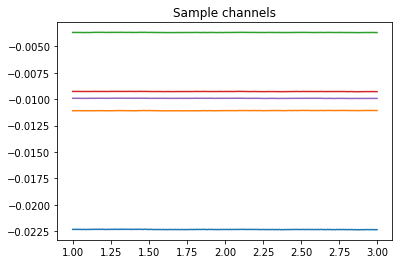

In [14]:
# Extract data from the first 5 channels, from 1 s to 3 s.
sfreq = raw.info['sfreq']
data, times = raw[:5, int(sfreq * 1):int(sfreq * 3)]
_ = plt.plot(times, data.T)
_ = plt.title('Sample channels')

plt.show()

### Marking BAD Channels

Sometimes some MEG or EEG channels are not functioning properly for various reasons. These channels should be excluded from analysis by marking them bad as:


Especially if a channel does not show a signal at all (flat) it is important to exclude it from the analysis, since its noise estimate will be unrealistically low and thus the current estimate calculations will give a strong weight to the zero signal on the flat channels and will essentially vanish. It is also important to exclude noisy channels because they can possibly affect others when signal-space projections or EEG average electrode reference is employed. Noisy bad channels can also adversely affect averaging and noise-covariance matrix estimation by causing unnecessary rejections of epochs.

Recommended ways to identify bad channels are:

* Observe the quality of data during data acquisition and make notes of observed malfunctioning channels to your measurement protocol sheet.
* View the on-line averages and check the condition of the channels.
* Compute preliminary off-line averages with artefact rejection, SSP/ICA, and EEG average electrode reference computation off and check the condition of the channels.
* View raw data with mne.io.Raw.plot() without SSP/ICA enabled and identify bad channels.